In [17]:
import pandas as pd
import numpy as np
import time
import urllib.request
import bs4 as bs
import requests

def soup_from_url(url):
    sauce = urllib.request.Request(url, headers={'User-agent': 'Mozilla/5.0 (X11; U; Linux i686) Gecko/20071127 Firefox/2.0.0.11'} )
    sauce = urllib.request.urlopen(sauce).read()

    soup = bs.BeautifulSoup(sauce, 'lxml')
    return soup

#List teams Dota 2 from site gamepedia (CORRECT VARIANT)
def pick_up_nameTeam(url):
    soup = soup_from_url(url)
    body = soup.body  
    list_team = []
    i=0
    for par in body.find_all('caption'):
        for name in par.find_all('a'):
            s = name.text
            if s == 'The Dire' or len(s) == 0:
                break
            else:
                list_team.append(s)
    return list_team

list_teamName = pick_up_nameTeam('https://dota2.gamepedia.com/Professional_teams')  

#List of all Heroes in Dota2
def pick_up_Heroes(url):
    soup = soup_from_url(url)
    body = soup.body    
    list_Heroes=[]
    for par in body.find_all('div', class_='name'):
        list_Heroes.append(par.text)
    return list_Heroes

Heroes = pick_up_Heroes('https://ru.dotabuff.com/heroes')


In [18]:
# List teams Dota 2 from site game-tournament
# def pick_up_nameTeam(url, list_team):
#     soup = soup_from_url(url)
#     body = soup.body    
#     i=0
#     for par in body.find_all('a', class_='teamname1'):
#         if i < 20:
#             list_team.append(par.get('title'))
#         i+=1

# list_teamName=[]

# pick_up_nameTeam('http://game-tournaments.com/dota-2/team', list_teamName)
# pick_up_nameTeam('http://game-tournaments.com/dota-2/team?s=2', list_teamName)
# pick_up_nameTeam('http://game-tournaments.com/dota-2/team?s=3', list_teamName)

# remove wrong team
# list_teamName.remove('Gorillaz-Pride')


#change name team
#list_teamName.remove('OG')
#list_teamName.insert(1, 'OG Dota2')
# list_teamName.remove('Virtus.Pro')
# list_teamName.insert(1, 'Virtus.pro')
# list_teamName.remove('NewBee')
# list_teamName.insert(1, 'Newbee')
# list_teamName.remove('Team Effect')
# list_teamName.insert(39, 'Effect')
# list_teamName.remove('LGD Gaming')
# list_teamName.insert(4, 'LGD-GAMING')

#add team
# list_teamName.append('Faceless')
# list_teamName.append('Mineski')
# list_teamName.append('compLexity Gaming')
# list_teamName.append('Alliance')


#list_teamName

In [3]:
# pick up all matches from site DOTABUFF
def pick_up_matches(url, list_with_matches):
    sauce = urllib.request.Request(url, 
                                   headers={'User-agent': 'Mozilla/5.0 (X11; U; Linux i686) Gecko/20071127 Firefox/2.0.0.11'})
    sauce = urllib.request.urlopen(sauce).read()

    soup = bs.BeautifulSoup(sauce, 'lxml')
    body = soup.body
    #matches_all_data = []

    for paragraph in body.find_all('a', class_='match-score'):
        #counters for radiant or dire, if j=0 then all data filling for radiant, else dire
        j=0
        match = []

        # choose name team in the match, 1st team - radiant, 2nd - dire
        for span in paragraph.find_all('span', class_=('team-text')):
            
#             #add name team
#             try:
#                 number_team = list_teamName.index(span.text)
#             except ValueError:
#                 print (span.text)
#                 break;
                
#             #match.append(number_team)
            
            for team_winner in paragraph.find_all('div', class_= ('match-score-teams')):

                #count for 1st & 2nd team. if j=0 then 1st team else 2nd team in the match
                if j == 1:    
                    for team in team_winner.find_all('div', class_= ( 'radiant team-winner')):
                        winner = 0
                else:
                    for team in team_winner.find_all('div', class_= ( 'dire team-winner')):
                        winner = 1

            #choose all heroes the correct team
            for team_heroes in paragraph.find_all('div', class_= ('match-score-heroes')):
                if j == 0:
                    for team in team_heroes.find_all('div', class_= ('radiant')):
                        for heroes in team.find_all('img', class_='image-hero') :
                            match.append(int(Heroes.index(heroes.get('title'))))
                else:
                    for team in team_heroes.find_all('div', class_= ('dire')):
                        for heroes in team.find_all('img', class_='image-hero') :
                            match.append(int(Heroes.index(heroes.get('title'))))
                    #add last elements if 0 then win radiant, 1 - dire
                        match.append(winner)

            #add all data for match in list with all matches
            
            j+=1
        #if len(match) == 11:
        list_with_matches.append(match)

In [19]:
#Epicenter 2017
list_matches_Epicenter = []
url_Epicenter = 'https://ru.dotabuff.com/esports/leagues/5353-epicenter-moscow-season-2/scores?original_slug=5353-epicenter-moscow-season-2&series_status=live_or_completed'
pick_up_matches(url_Epicenter, list_matches_Epicenter)

#Dream league 2017
list_matches_Dream2017 = []
url_Dream2017 = 'https://ru.dotabuff.com/esports/leagues/5336-dreamleague-season-7/scores?original_slug=5336-dreamleague-season-7'
pick_up_matches(url_Dream2017, list_matches_Dream2017)

#MDL 2017
list_matches_MDL2017 = []
url_MDL2017 = 'https://ru.dotabuff.com/esports/leagues/5504-2017-mars-dota-2-league/scores'
pick_up_matches(url_MDL2017, list_matches_MDL2017)

#The Summit
list_matches_Summit = []
url_Summit = 'https://ru.dotabuff.com/esports/leagues/4442-the-summit-5/scores'
pick_up_matches(url_Summit, list_matches_Summit)

#Galaxy Battle
list_matches_Galaxy = []
url_Galaxy = 'https://ru.dotabuff.com/esports/leagues/5399-neso-4th-national-e-sports-shenzhen-open-tournament-galaxy-battles/scores'
pick_up_matches(url_Galaxy, list_matches_Galaxy)

#The Kiev Major
list_matches_KievMajor = []
url_KievMajor = 'https://ru.dotabuff.com/esports/leagues/5157-kiev-major/scores'
pick_up_matches(url_KievMajor, list_matches_KievMajor)

url_KievMajor = 'https://ru.dotabuff.com/esports/leagues/5157-kiev-major/scores?original_slug=5157-kiev-major&page=2'
pick_up_matches(url_KievMajor, list_matches_KievMajor)

url_KievMajor = 'https://ru.dotabuff.com/esports/leagues/5157-kiev-major/scores?original_slug=5157-kiev-major&page=3'
pick_up_matches(url_KievMajor, list_matches_KievMajor)

#The International 2017
list_matches_International2017 = []
url_International2017 = 'https://ru.dotabuff.com/esports/leagues/5401-the-international-2017/scores'
pick_up_matches(url_International2017, list_matches_International2017)


In [20]:
#Create testing data from data The International
df_International = pd.DataFrame(list_matches_International2017, columns= ['H1_t1', 'H2_t1','H3_t1','H4_t1','H5_t1','H1_t2', 'H2_t2', 'H3_t2', 'H4_t2','H5_t2', 'winner'])

test_matches = df_International.drop(['winner'], axis='columns')
test_winner =  (df_International.winner)


In [98]:
#def dataFrame_
#df = pd.DataFrame(list_matches_Epicenter, columns= ['team_name', 'H1_t1', 'H2_t1','H3_t1','H4_t1','H5_t1','team_name','H1_t2', 'H2_t2', 'H3_t2', 'H4_t2','H5_t2', 'winner'])
list_all_matches =  (list_matches_Epicenter + list_matches_MDL2017 + list_matches_Dream2017 + list_matches_Summit +
                    list_matches_Galaxy + list_matches_KievMajor)

df = pd.DataFrame(list_all_matches, columns= ['H1_t1', 'H2_t1','H3_t1','H4_t1','H5_t1','H1_t2', 'H2_t2', 'H3_t2', 'H4_t2','H5_t2', 'winner'])

training_matchs = df.drop(['winner'], axis='columns').dropna()

training_winner =  (df.winner.dropna())

#print (training_winner.append(test_winner))

In [149]:
from sklearn import tree
from sklearn import preprocessing, cross_validation, svm

clf = tree.DecisionTreeClassifier(max_depth=9)
#clf = svm.SVR()
clf.fit(training_matchs, training_winner)

#testing on International 
predict_df = pd.DataFrame(clf.predict(test_matches), columns=['Predict'])
predict_df['correct'] = test_winner

accuarcy = clf.score(test_matches, test_winner)

print ('Tree:')
print ('Training data: {:.2f}'.format(clf.score(training_matchs, training_winner)))
print ('Test data (International 2017): {:.2f}'.format(clf.score(test_matches, test_winner)))

Tree:
Training data: 0.74
Test data (International 2017): 0.57


In [178]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=25, random_state=42, max_depth=9, max_features=3)

forest.fit(training_matchs, training_winner)

print ('Forest:')
print ('Training data: {:.2f}'.format(forest.score(training_matchs, training_winner)))
print ('Test data (International 2017): {:.2f}'.format(forest.score(test_matches, test_winner)))

Forest:
Training data: 0.95
Test data (International 2017): 0.58


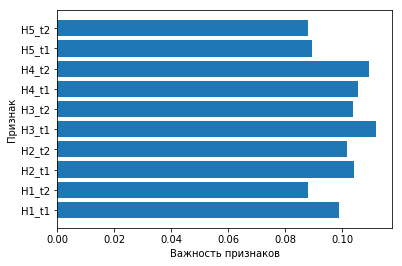

In [77]:
import matplotlib.pyplot as plt

#importances features (Heroes)
def plot_feature_importances_cancer(model):
    plt.barh(training_matchs.columns, model.feature_importances_)
    plt.xlabel('Важность признаков')
    plt.ylabel('Признак')
plot_feature_importances_cancer(forest)

In [181]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    training_matchs.append(test_matches), training_winner.append(test_winner), random_state=0)

forest_split_data = RandomForestClassifier(n_estimators=25, random_state=42, max_depth=7)

forest_split_data.fit(X_train, y_train)
print ('Forest with split data:')
print ('Training data: {:.2f}'.format(forest_split_data.score(X_train, y_train)))
print ('Test data: {:.2f}'.format(forest_split_data.score(X_test, y_test)))

Forest with split data:
Training data: 0.92
Test data: 0.52
